<a href="https://colab.research.google.com/github/vikramdubey123/Python-Diwali-Analysis-Project/blob/main/python_diwali_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Importing Important Libraries for Data Analysis & Visualization*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("/content/Diwali Sales Data.csv", encoding='latin1')

# Display first 5 rows
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# *Understand* the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
pd.isnull(df).sum()


,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df.shape

(11251, 13)

# Data *Cleaning*
Drop unwanted columns (Status, unnamed1)

Handle missing values (Amount cleanup)

Convert datatypes (Amount → int)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(11239, 13)

In [ ]:
pd.isnull(df).sum()


,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df['Amount'] = (df['Amount']
                .astype(str)
                .str.replace(r'[₹, ]', '', regex=True)
               )
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Amount'] = df['Amount'].fillna(0).astype(int)


In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis
* Gender



In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

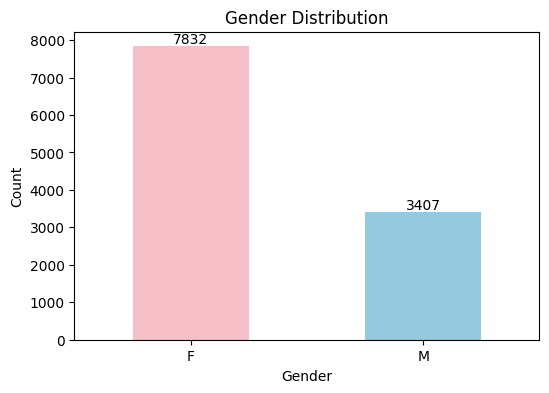

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', hue='Gender', data=df, palette={'M':'skyblue','F':'lightpink'}, width=0.5, dodge=False, legend=False)
for bars in ax.containers: ax.bar_label(bars)
plt.title("Gender Distribution"); plt.xlabel("Gender"); plt.ylabel("Count")
plt.show()


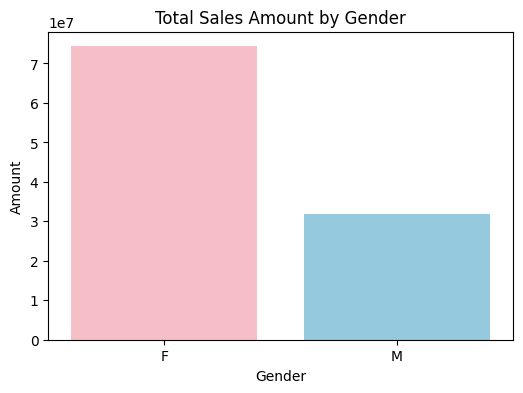

In [ ]:
# Total Sales Amount by Gender :
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Amount', hue='Gender', dodge=False, legend=False,
            data=df.groupby('Gender', as_index=False)['Amount'].sum().sort_values('Amount', ascending=False),
            palette={'M':'skyblue','F':'lightpink'})
plt.title("Total Sales Amount by Gender"); plt.xlabel("Gender"); plt.ylabel("Amount"); plt.show()


* *From above of the grahs we can see most of the buyers are females and even the purchasing power of females are greater than men.*


# Age

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

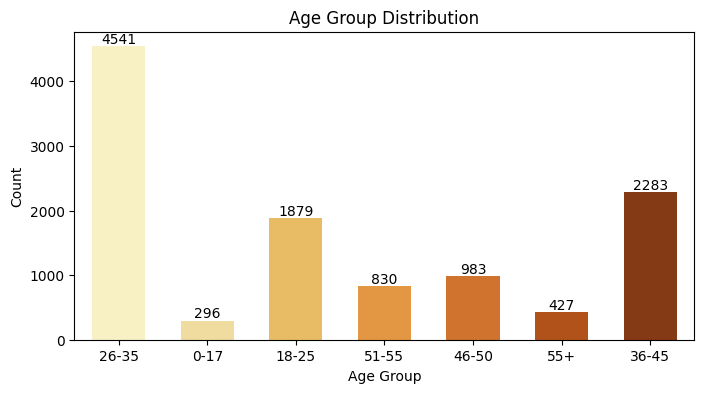

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Age Group', hue='Age Group', data=df, palette='YlOrBr', dodge=False, legend=False, width=0.6)
for bars in ax.containers: ax.bar_label(bars)
plt.title("Age Group Distribution"); plt.xlabel("Age Group"); plt.ylabel("Count"); plt.show()

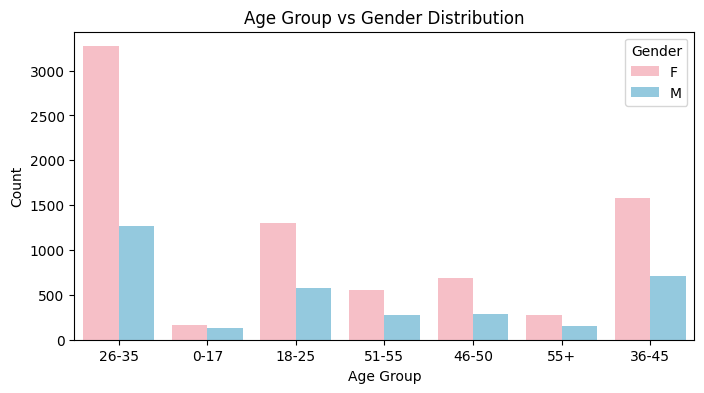

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Age Group', hue='Gender', data=df, palette={'M':'skyblue','F':'lightpink'}, dodge=True)
plt.title("Age Group vs Gender Distribution"); plt.xlabel("Age Group"); plt.ylabel("Count"); plt.show()

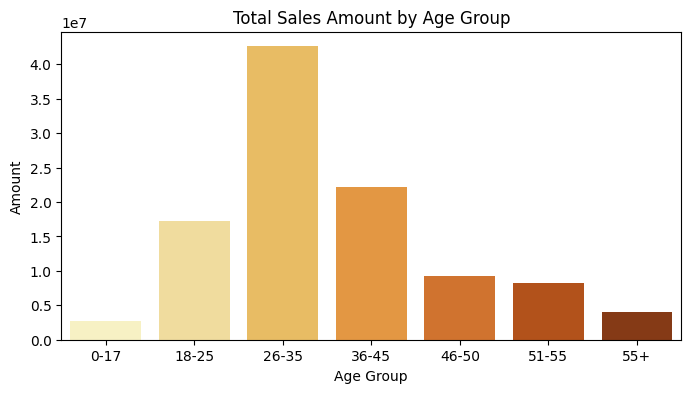

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(
    x='Age Group', y='Amount', hue='Age Group', dodge=False, legend=False,
    data=df.groupby('Age Group', as_index=False)['Amount'].sum(),
    palette='YlOrBr'
)
plt.title("Total Sales Amount by Age Group"); plt.xlabel("Age Group"); plt.ylabel("Amount"); plt.show()

*From above graphs we can see that most of the buyers are females in the age group between 26-35 years.*

# *State*

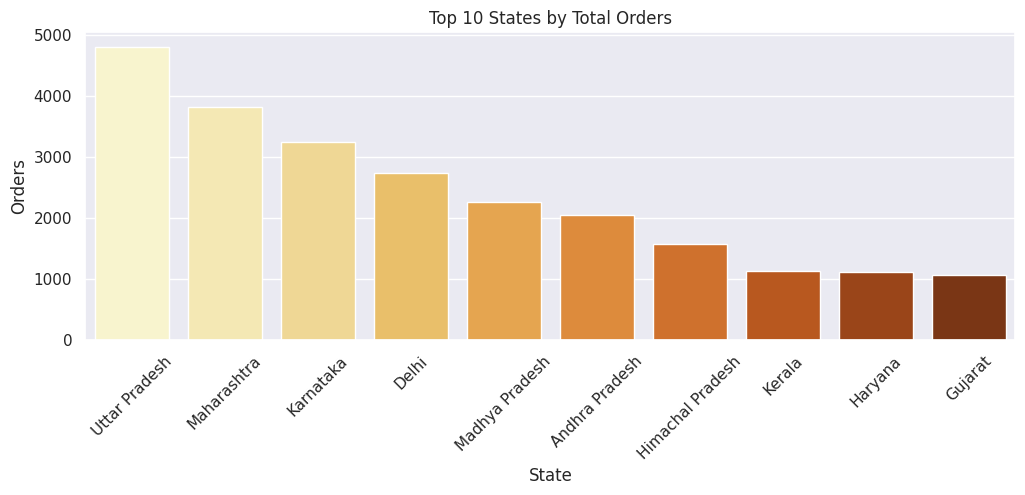

In [ ]:
# Total number of Orders from top 10 States
plt.figure(figsize=(12,4))
ax = sns.barplot(
    x='State',
    y='Orders',
    hue='State',       # explicitly set hue
    dodge=False,
    legend=False,
    data=sales_state,
    palette='YlOrBr'
)
plt.title("Top 10 States by Total Orders")
plt.xlabel("State")
plt.ylabel("Orders")
plt.xticks(rotation=45)
plt.show()


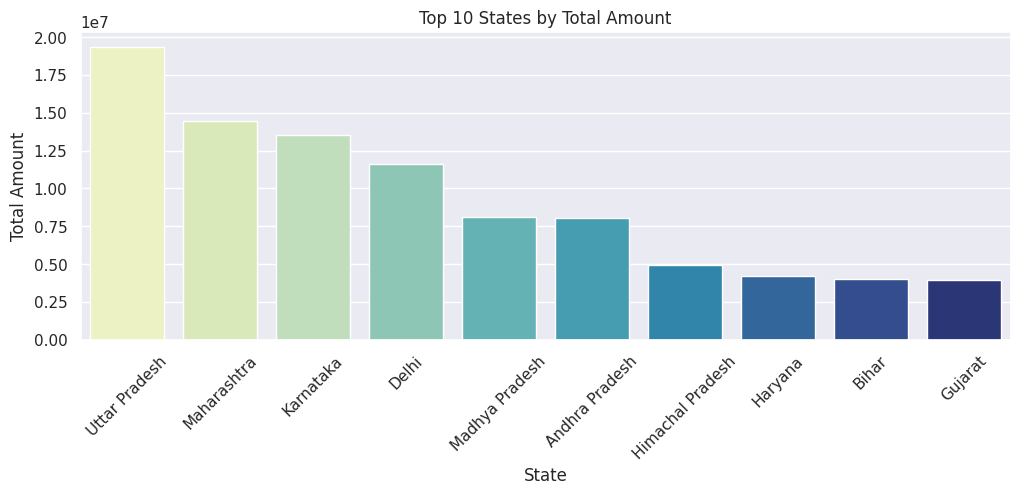

In [ ]:
# Total Amount from top 10 States
plt.figure(figsize=(12,4))
ax = sns.barplot(
    x='State',
    y='Amount',
    hue='State',       # explicitly set hue
    dodge=False,
    legend=False,
    data=sales_state,
    palette='YlGnBu'
)
plt.title("Top 10 States by Total Amount")
plt.xlabel("State")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


* *From above graphs we can see that most of the orders/Total Sales/Amount are from the Uttar Pradesh, Maharashtra and Karnataka respectively.*

# *Marital Status*

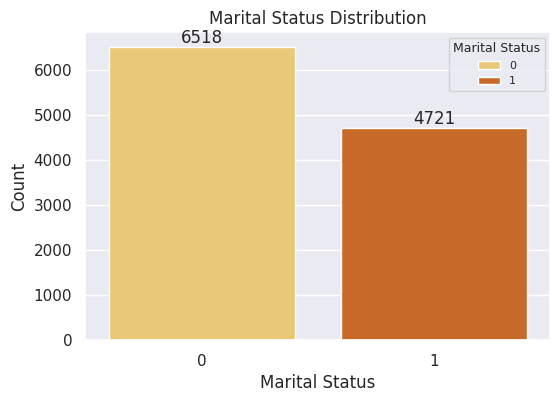

In [ ]:
ax = sns.countplot(x='Marital_Status', hue='Marital_Status', data=df, palette='YlOrBr')
sns.set(rc={'figure.figsize':(6,4)})

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")

plt.legend(title="Marital Status", fontsize=8, title_fontsize=9)
plt.show()


*Occupation*

Text(0, 0.5, 'Count')

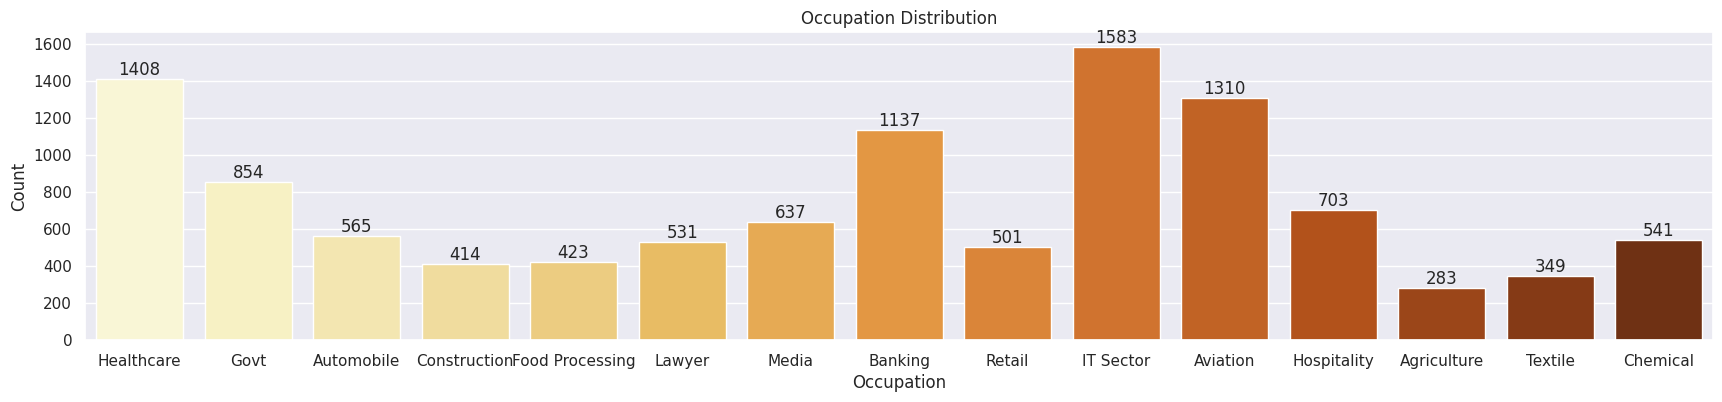

In [ ]:
sns.set(rc={'figure.figsize':(21,4)})
ax = sns.countplot(x='Occupation', data=df, palette='YlOrBr', hue='Occupation', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Occupation Distribution")
plt.xlabel("Occupation")
plt.ylabel("Count")


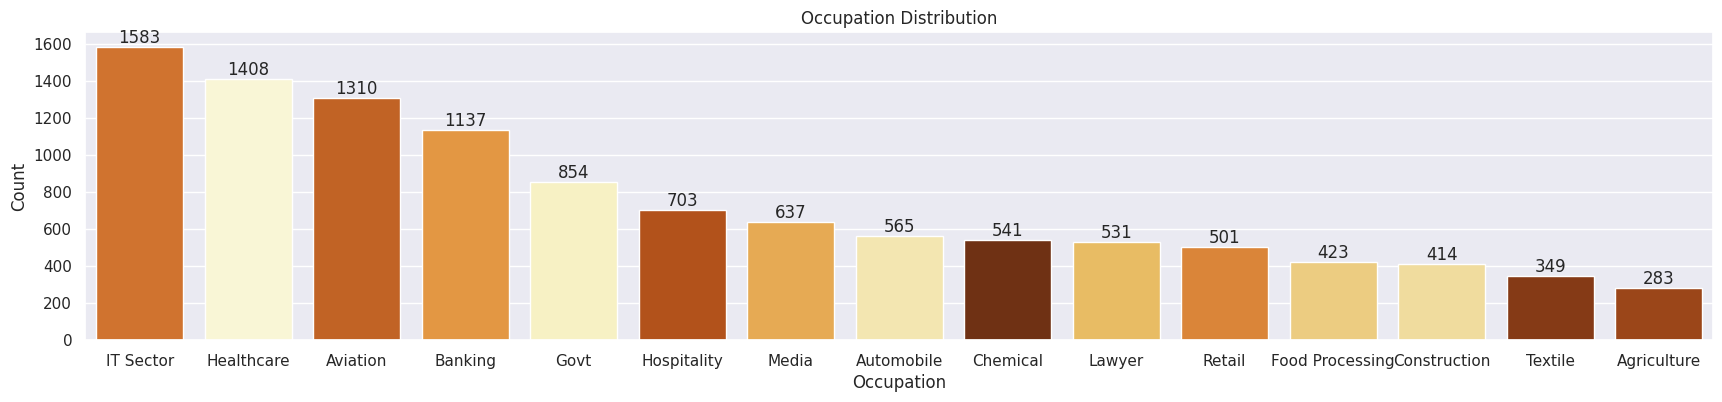

In [ ]:
sns.set(rc={'figure.figsize':(21,4)})

ax = sns.countplot(
    x='Occupation',
    data=df,
    order=df['Occupation'].value_counts().index,
    palette='YlOrBr',
    hue='Occupation',
    legend=False
)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Occupation Distribution")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

*From the above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.*

# *Product Category*

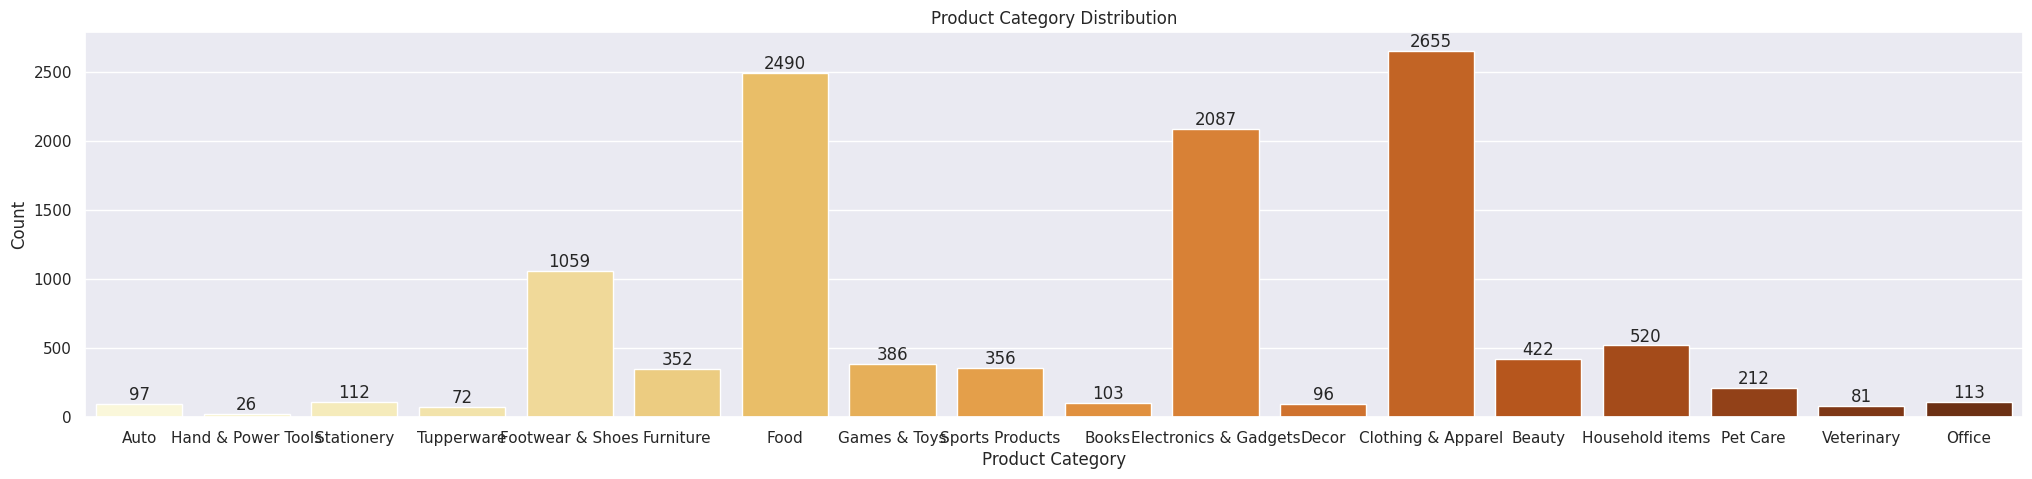

In [ ]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(x='Product_Category', data=df, palette='YlOrBr', hue='Product_Category', legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Total Sales Amount')

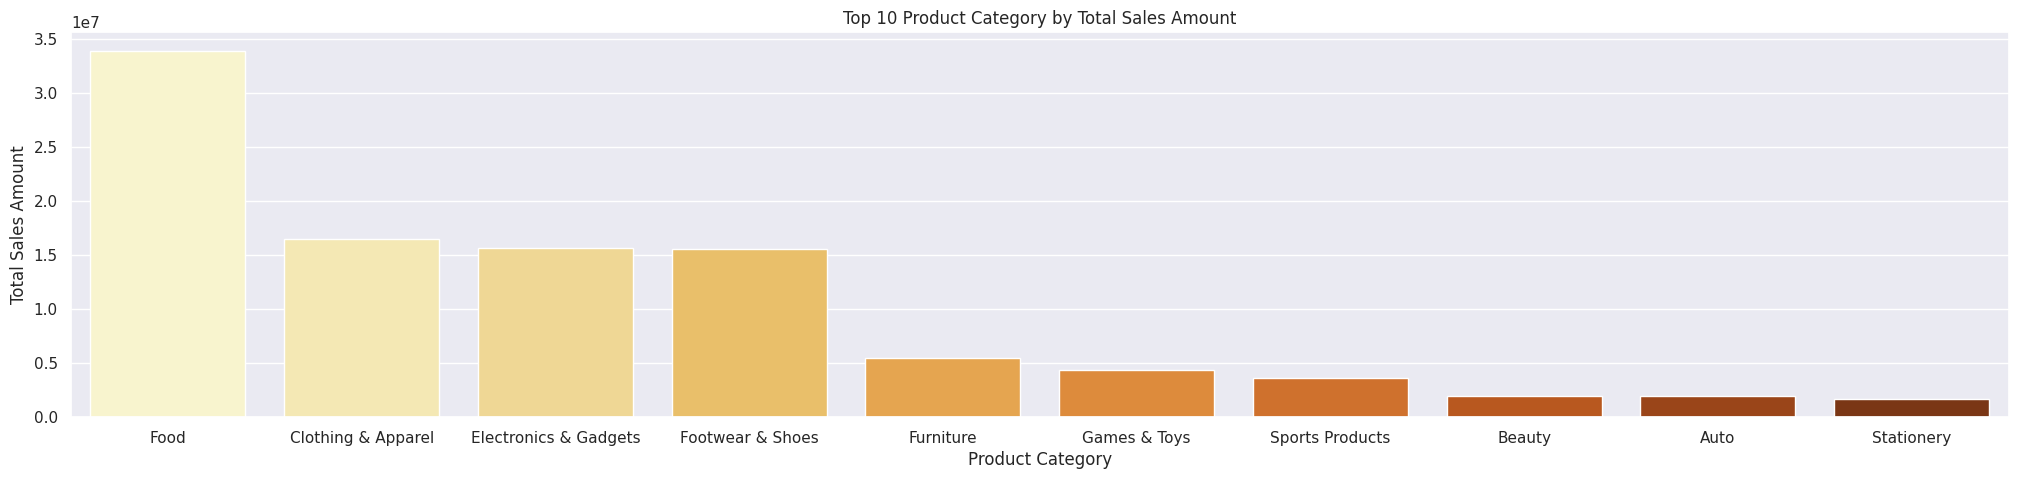

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount', hue='Product_Category', palette='YlOrBr', legend=False)
plt.title("Top 10 Product Category by Total Sales Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")


*From the above graphs we can see that most of the sold products are from food,cloathing and Electronics category.*

#Conclusion:

*Married Woman are group 26-35 years from Uttar Pradesh , Maharashtra and Karnataka working in IT , Healthcare and Aviation are more likely buy products from Food,Cloathing and Electronics category.*